In [33]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import utils
from yellowbrick.features import rank1d, rank2d


csv = './dataset_benchmark.csv'
df = pd.read_csv(csv)

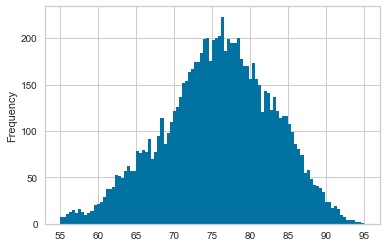

In [34]:
df.AGE_AT_EXAM.plot.hist(bins=100)

In [35]:
cols = ['RID', 'diagnosis', 'ADAS13', 'Ventricles','CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate','Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp','APOE4', 'AGE_AT_EXAM']

In [36]:
df_reduced = df[cols].dropna()

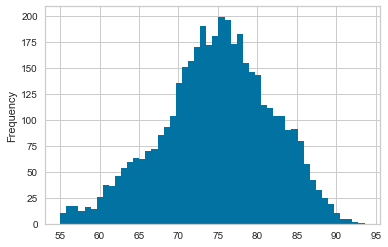

In [37]:
plt.figure()
df_reduced['AGE_AT_EXAM'].plot.hist(bins=50)

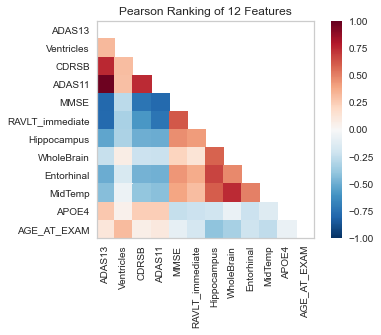

/Users/Sam/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Rank2D(algorithm=None,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c29edb048>,
       colormap='RdBu_r', features=None, show_feature_names=None)

In [38]:
rank2d(df_reduced.drop(columns=['RID','diagnosis']))

In [40]:
hist = np.histogram(df_reduced.AGE_AT_EXAM)

In [42]:
hist[1]

array([55.        , 58.85863107, 62.71726215, 66.57589322, 70.4345243 ,
       74.29315537, 78.15178645, 82.01041752, 85.8690486 , 89.72767967,
       93.58631075])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c28b9c2b0>]],
      dtype=object)

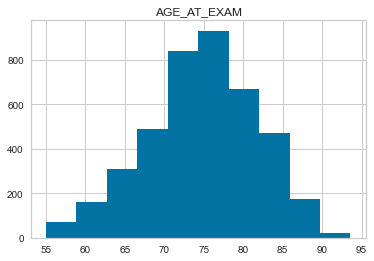

In [65]:
df_reduced.hist(column='AGE_AT_EXAM')

In [56]:
binalloc = pd.cut(df_reduced.AGE_AT_EXAM, 10, labels=False)
binalloc.values

array([5, 6, 6, ..., 5, 3, 3])

In [57]:
df_reduced['age_bin'] = binalloc.values

In [70]:
bootstrapped_df = df_reduced.groupby('age_bin').apply(lambda x: x.sample(n=100, replace=True)).reset_index(drop = True)

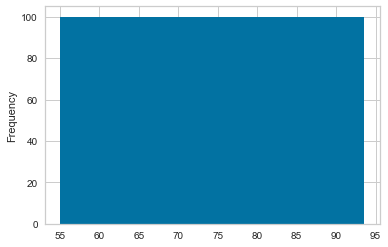

In [71]:
bootstrapped_df.AGE_AT_EXAM.plot.hist()

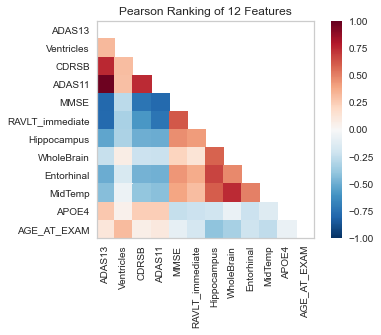

Rank2D(algorithm=None,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c18e52b38>,
       colormap='RdBu_r', features=None, show_feature_names=None)

In [72]:
rank2d(df_reduced.drop(columns=['RID','diagnosis', 'age_bin']))

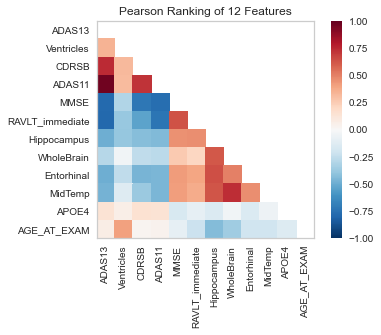

Rank2D(algorithm=None,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c29686320>,
       colormap='RdBu_r', features=None, show_feature_names=None)

In [73]:
rank2d(bootstrapped_df.drop(columns=['RID','diagnosis', 'age_bin']))